<a href="https://colab.research.google.com/github/Hubobv/Midterms_test/blob/main/flower_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
import numpy as np
from numpy import save
from keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout
from keras.optimizers import Adam,SGD
import matplotlib.pyplot as plt

# specify the folder here
folder = '/content/drive/MyDrive/flower/'

photos, labels = list(), list()

for file in listdir(folder):
    output = None
    if file.startswith('hong'):
        output = 0
    if file.startswith('sen'):
        output = 1
    if file.startswith('sung'):
        output = 2
    if file.startswith('cuc'):
        output = 3
    if file.startswith('mai'):
        output = 4
    if output is not None:
      photo = load_img(folder + file, target_size=(200, 200, 3))
      photo = img_to_array(photo)
      photos.append(photo)
      labels.append(output)

photos = np.array(photos)
labels = np.array(labels)

# Normalize images
photos= photos.astype('float32')/255

# One-hot encode labels
labels = to_categorical(labels,10)

# Save photos and labels to disk
save('/content/drive/MyDrive/monan/flower_photos.npy', photos)
save('/content/drive/MyDrive/monan/flower_labels.npy', labels)

# Define the model
model = Sequential()
model.add(Conv2D(32,(3,3), padding='same', input_shape=(200, 200,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
#model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
from keras.losses import categorical_crossentropy
sgd = SGD(lr = 0.001, decay = 1e-6, momentum = 0.8, nesterov= True)
model.compile(loss= categorical_crossentropy, optimizer= sgd, metrics = ['accuracy'])
# Train the model
train = model.fit(photos, labels, batch_size=64, epochs=30, verbose=1)

Epoch 1/30
7/7 [==============================] - 4s 551ms/step - loss: 2.1179 - accuracy: 0.2488
Epoch 2/30
7/7 [==============================] - 2s 220ms/step - loss: 1.6994 - accuracy: 0.3171
Epoch 3/30
7/7 [==============================] - 2s 220ms/step - loss: 1.5651 - accuracy: 0.3488
Epoch 4/30
7/7 [==============================] - 2s 222ms/step - loss: 1.4841 - accuracy: 0.3927
Epoch 5/30
7/7 [==============================] - 2s 226ms/step - loss: 1.4605 - accuracy: 0.4390
Epoch 6/30
7/7 [==============================] - 2s 222ms/step - loss: 1.3191 - accuracy: 0.5146
Epoch 7/30
7/7 [==============================] - 2s 231ms/step - loss: 1.1938 - accuracy: 0.5683
Epoch 8/30
7/7 [==============================] - 2s 226ms/step - loss: 1.0348 - accuracy: 0.6171
Epoch 9/30
7/7 [==============================] - 2s 223ms/step - loss: 0.9562 - accuracy: 0.6561
Epoch 10/30
7/7 [==============================] - 2s 225ms/step - loss: 0.8885 - accuracy: 0.6756
Epoch 11/30
7/7 [==

In [ ]:
from keras.models import load_model
model.save('model3.h5')

In [ ]:
classes=['hong','sen','sung','cuc','mai']

1/1 [==============================] - 0s 78ms/step
[[7.8424448e-01 7.2027005e-02 4.5766454e-02 2.2056693e-07 9.7767919e-02
  3.3095330e-05 8.4984043e-05 2.3739032e-05 6.9878265e-06 4.5130168e-05]]


'hong'

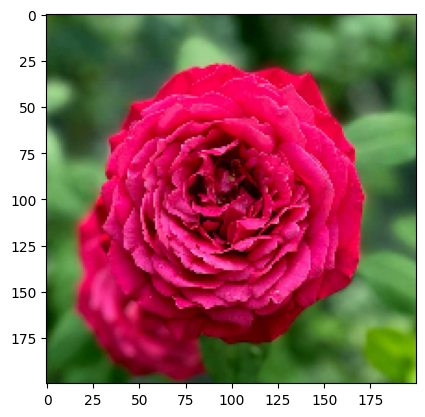

In [ ]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
model10=load_model('model3.h5')
img=load_img('/content/drive/MyDrive/hoahong.jpg', target_size=(200,200)) 
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)  
img = img.astype('float32')
img /= 255
y_pred = model10.predict(img)
print(y_pred)
y_classes = [np.argmax(i) for i in y_pred]
y_classes
classes[y_classes[0]]